<a href="https://www.kaggle.com/code/atifmasih/air-qaulity-categorization-using-randomforest-94?scriptVersionId=191792370" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/environmental-monitoring-data-for-multiple-sites/air_quality_dataset.csv


**Goal:**


*Classify air quality data into different categories based on the concentrations of pollutants.*

import required libraries first

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,accuracy_score, classification_report


**Load the dataset**

In [3]:
#Load the dataset
df = pd.read_csv('/kaggle/input/environmental-monitoring-data-for-multiple-sites/air_quality_dataset.csv')
df.head(10)

,SITE_ID,Week,Year,DATEOFF,Ca,Cl,HNO3,HNO3 PPB,K,Mg,Na,NH4,NO3,SO2,SO2 PPB,SO4,TNO3,DATEON
0,ABT147,27,2023,7/11/2023 8:00:00 AM,0.042,0.032,0.759,0.295,0.129,0.022,0.055,0.279,0.088,0.258,0.098,0.915,0.834,7/04/2023
1,ABT147,28,2023,7/18/2023 8:00:00 AM,0.114,0.033,0.74,0.287,0.091,0.056,0.302,0.268,0.332,0.316,0.121,1.273,1.06,7/11/2023
2,ABT147,29,2023,7/25/2023 8:00:00 AM,0.062,0.033,0.648,0.251,0.074,0.02,0.07,0.276,0.128,0.294,0.112,0.705,0.766,7/18/2023
3,ABT147,30,2023,8/01/2023 8:00:00 AM,0.064,0.033,0.598,0.232,0.069,0.022,0.096,0.304,0.196,0.333,0.127,0.841,0.784,7/25/2023
4,ABT147,31,2023,8/08/2023 8:00:00 AM,0.059,0.176,0.348,0.135,0.065,0.033,0.208,0.366,0.382,0.331,0.126,0.596,0.724,8/01/2023
5,ABT147,32,2023,8/15/2023 8:00:00 AM,0.064,0.033,0.366,0.142,0.062,0.017,0.058,0.309,0.222,0.269,0.103,0.672,0.582,8/08/2023
6,ABT147,33,2023,8/22/2023 8:00:00 AM,0.054,0.034,0.422,0.164,0.059,0.015,0.031,0.266,0.105,0.293,0.112,0.596,0.52,8/15/2023
7,ABT147,34,2023,8/29/2023 8:00:00 AM,0.041,0.034,0.25,0.097,0.043,0.019,0.113,0.116,0.189,0.161,0.061,0.418,0.434,8/22/2023
8,ABT147,35,2023,9/05/2023 8:00:00 AM,0.175,0.034,0.467,0.181,0.051,0.035,0.096,0.282,0.457,0.316,0.121,0.725,0.917,8/29/2023
9,ABT147,36,2023,9/12/2023 8:00:00 AM,0.24,0.033,0.649,0.252,0.071,0.046,0.109,0.425,0.323,0.265,0.101,1.515,0.962,9/05/2023


**Exploration of dataset**

In [4]:
df.shape

(2103, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103 entries, 0 to 2102
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SITE_ID   2103 non-null   object
 1   Week      2103 non-null   int64 
 2   Year      2103 non-null   int64 
 3   DATEOFF   2103 non-null   object
 4   Ca        2103 non-null   object
 5   Cl        2103 non-null   object
 6   HNO3      2103 non-null   object
 7   HNO3 PPB  2103 non-null   object
 8   K         2103 non-null   object
 9   Mg        2103 non-null   object
 10  Na        2103 non-null   object
 11  NH4       2103 non-null   object
 12  NO3       2103 non-null   object
 13  SO2       2103 non-null   object
 14  SO2 PPB   2103 non-null   object
 15  SO4       2103 non-null   object
 16  TNO3      2103 non-null   object
 17  DATEON    2103 non-null   object
dtypes: int64(2), object(16)
memory usage: 295.9+ KB


**Convert object types data in to numeric for visualiztions**

In [6]:
# Convert columns to appropriate data types
df['DATEOFF'] = pd.to_datetime(df['DATEOFF'], errors='coerce')
df['DATEON'] = pd.to_datetime(df['DATEON'], errors='coerce')


In [7]:
# Convert numeric columns (assume columns with numerical data need conversion)
numeric_columns = df.columns.drop(['SITE_ID', 'DATEOFF', 'DATEON']).tolist()

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Check data types after conversion
print(df.dtypes)

SITE_ID             object
Week                 int64
Year                 int64
DATEOFF     datetime64[ns]
Ca                 float64
Cl                 float64
HNO3               float64
HNO3 PPB           float64
K                  float64
Mg                 float64
Na                 float64
NH4                float64
NO3                float64
SO2                float64
SO2 PPB            float64
SO4                float64
TNO3               float64
DATEON      datetime64[ns]
dtype: object


In [8]:
df.describe()

,Week,Year,DATEOFF,Ca,Cl,HNO3,HNO3 PPB,K,Mg,Na,NH4,NO3,SO2,SO2 PPB,SO4,TNO3,DATEON
count,2103.000000,2103.0,2103,2038.000000,2038.000000,2039.000000,2039.000000,2037.000000,2038.000000,2038.000000,2038.000000,2038.000000,1569.000000,1569.000000,2038.000000,2038.000000,2103
mean,39.451260,2023.0,2023-10-06 11:48:42.111269632,0.264507,0.161672,0.456704,0.177213,0.060107,0.047026,0.142830,0.285585,0.457210,0.415128,0.158440,0.730974,0.906727,2023-09-29 03:48:42.111269376
min,27.000000,2023.0,2023-07-11 08:00:00,0.005000,0.006000,0.028000,0.011000,0.004000,0.002000,0.003000,0.023000,0.019000,0.064000,0.024000,0.048000,0.056000,2023-07-04 00:00:00
25%,33.000000,2023.0,2023-08-22 08:00:00,0.094250,0.016000,0.225000,0.087000,0.030000,0.017000,0.017000,0.156250,0.123000,0.210000,0.080000,0.415250,0.468000,2023-08-15 00:00:00
50%,39.000000,2023.0,2023-10-03 08:00:00,0.173000,0.032000,0.399000,0.155000,0.054000,0.031000,0.032000,0.254000,0.267500,0.321000,0.123000,0.676000,0.780500,2023-09-26 00:00:00
75%,46.000000,2023.0,2023-11-21 08:00:00,0.313000,0.038000,0.625000,0.242500,0.080000,0.053000,0.097000,0.378000,0.601000,0.476000,0.182000,0.979000,1.163750,2023-11-14 00:00:00
max,52.000000,2023.0,2024-01-02 08:00:00,3.649000,14.182000,3.219000,1.249000,0.367000,0.897000,6.983000,1.847000,5.723000,3.329000,1.270000,2.890000,5.922000,2023-12-26 00:00:00
std,7.510182,0.0,NaN,0.319264,0.832494,0.309456,0.120066,0.042255,0.065288,0.458803,0.181608,0.534557,0.370906,0.141556,0.418933,0.633671,NaN


**Data Cleaning**

*Check for missing values:*

In [9]:
#Check for missing values
print(df.isnull().sum())

SITE_ID       0
Week          0
Year          0
DATEOFF       0
Ca           65
Cl           65
HNO3         64
HNO3 PPB     64
K            66
Mg           65
Na           65
NH4          65
NO3          65
SO2         534
SO2 PPB     534
SO4          65
TNO3         65
DATEON        0
dtype: int64


*Impute Missing Values with Mean*

In [10]:
# Calculate the mean of each column of type int64 and float64
means = df.select_dtypes(include=['int64', 'float64']).mean()

# Fill missing values with the mean of the respective column
df = df.fillna(means)

In [11]:
# Check for any remaining missing values again
print(df.isnull().sum())

SITE_ID     0
Week        0
Year        0
DATEOFF     0
Ca          0
Cl          0
HNO3        0
HNO3 PPB    0
K           0
Mg          0
Na          0
NH4         0
NO3         0
SO2         0
SO2 PPB     0
SO4         0
TNO3        0
DATEON      0
dtype: int64


*Check for duplicates:*

In [12]:
print(df.duplicated().sum())

0


*Let's visualize the features Distribution*

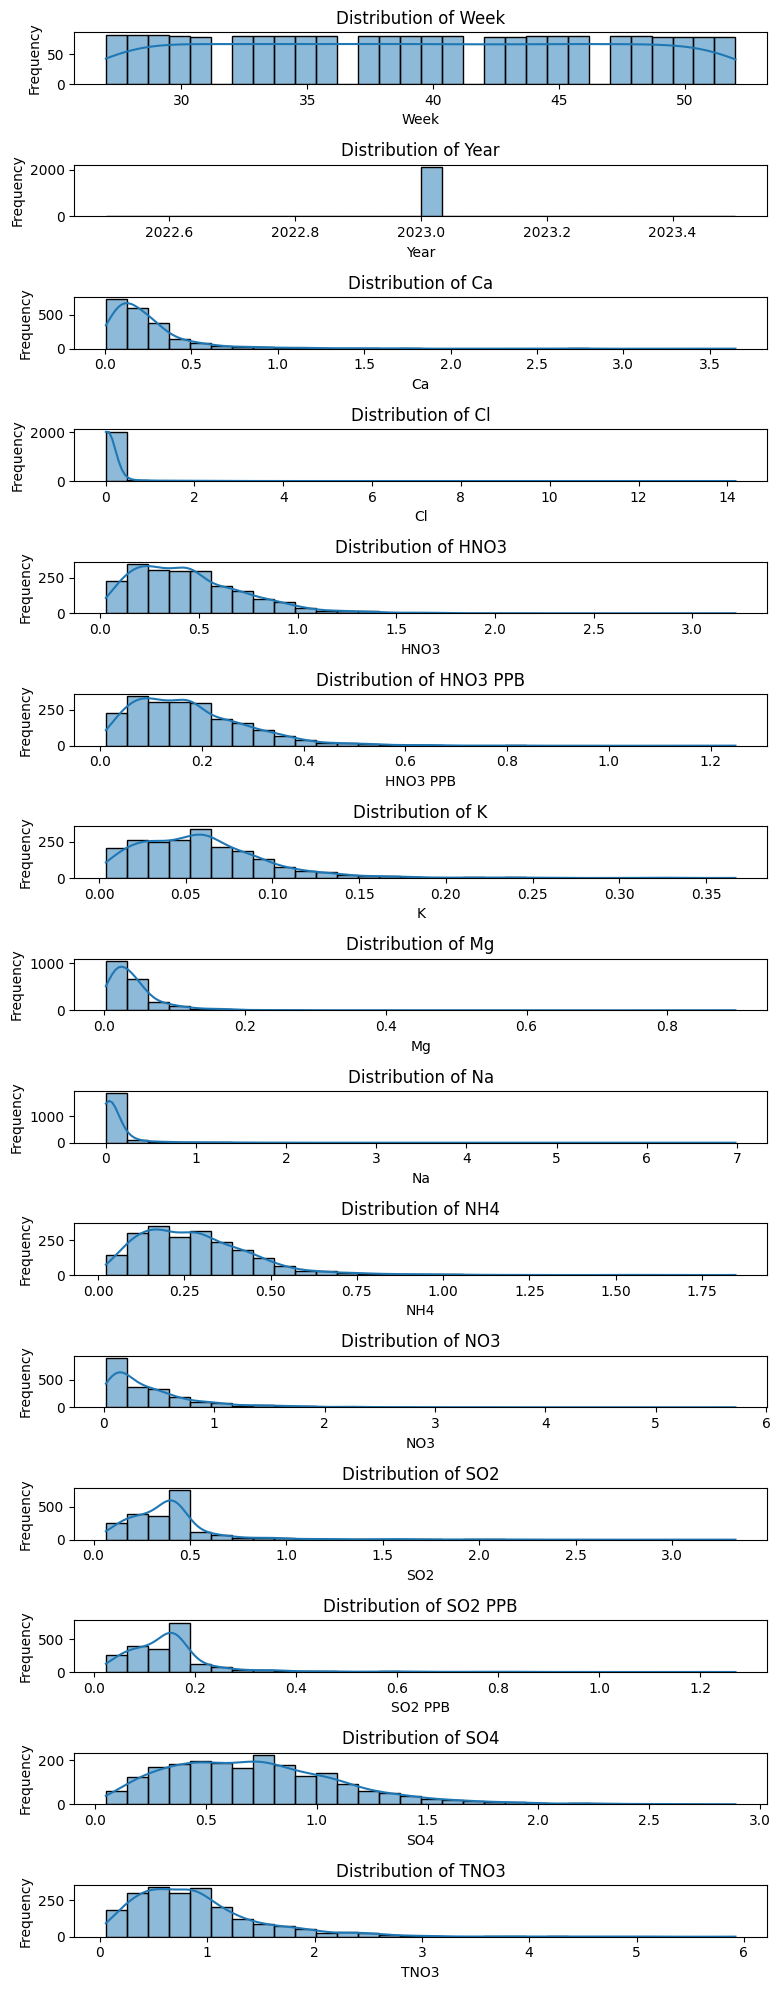

In [13]:
# List of numeric columns for visualization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))

# Plot histograms for all numeric variables
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 2, 2*i + 1)
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
#     # Box plot for the same variable
#     plt.subplot(len(numeric_columns), 2, 2*i + 2)
#     sns.boxplot(x=df[column].dropna())
#     plt.title(f'Box Plot of {column}')
#     plt.xlabel(column)

plt.tight_layout()
plt.show()

*We can clearly check the plots for better understanding the distributions. We got below range for maximum data samples:*

* ca : 0.0 to 1.0
* Cl : 0 to 2
* HNO3 : 0.0 to 1.5
* HNO3 PPB : 0.0 to 0.6
* K : 0.0 to 0.15
* Mg : 0.0 to 0.2
* Na : 0 to 1
* NH4 : 0.0 to 1.0
* NO3 : 0 to 2
* SO2 : 0.0 to 1.0
* SO4 : 0.0 to 0.4
* TNO3 : 0 to 3

*Apply Feature Scaling*

In [14]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_columns])

*Create air quality index and it's categories such as 'Very Poor', 'Poor', 'Moderate', 'Good'*

In [15]:
#Create a composite air quality index
df['Air_Quality_Index'] = np.mean(scaled_features, axis=1)

# Define categories based on the index
df['Air_Quality_Category'] = pd.cut(df['Air_Quality_Index'], bins=[-np.inf, -1, 0, 1, np.inf], labels=['Very Poor', 'Poor', 'Moderate', 'Good'])

**Let's create test and train set**

In [16]:
# Define features and target
X = df[numeric_columns]
y = df['Air_Quality_Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Lets Train the models**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9453681710213777
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      0.58      0.74        12
    Moderate       0.94      0.93      0.93       174
        Poor       0.95      0.97      0.96       235

    accuracy                           0.95       421
   macro avg       0.96      0.83      0.88       421
weighted avg       0.95      0.95      0.94       421



*Check data types:*